In [18]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# POM data

In [19]:
# Using POM data of France from https://github.com/Statistics-Netherlands/ewaste
pom = pd.read_csv('UNU_countries.csv')
pom = pom[pom['Country'] == 'FRA']
pom['POM_t'] = pom['POM_kg'] / 1000

# POM data in tonnes by UNU keys and years
pom_t = pom.pivot(values = 'POM_t', index = 'UNU_Key', columns = 'Year')

# POM data in pieces by UNU keys and years
pom_piece = pom.pivot(values = 'POM_pieces', index = 'UNU_Key', columns = 'Year')

In [20]:
# Using estimation of missing POM data of France from https://github.com/Statistics-Netherlands/ewaste
for_imputing = pd.read_csv('tbl_POM.csv')
for_imputing = for_imputing[for_imputing['Country'] == 'FRA']
for_imputing = for_imputing[(for_imputing['Year'] >= 1995) & (for_imputing['Year'] <= 2015)]

# Estimation of missing POM data in tonnes by UNU keys and years
for_imputing_t = for_imputing.pivot(values = 'POM_t', index = 'UNU_Key', columns = 'Year')

# Estimation of missing POM data in pieces by UNU keys and years
for_imputing_piece = for_imputing.pivot(values = 'POM_pieces', index = 'UNU_Key', columns = 'Year')

In [21]:
# Final POM data in tonnes
pom_t = pom_t.fillna(for_imputing_t)

# Final POM data in pieces
pom_piece = pom_piece.fillna(for_imputing_piece)

In [22]:
# List of UNU codes that are digital
UNU_digital = [301, 302, 303, 304, 305, 306, 307, 309, 401, 402, 404, 406, 702]

In [23]:
# UNU to EU6 conversion
UNU_to_EU6 = {
    1:      4,
    2:      4,
    101:    4,
    102:    4,
    103:    4,
    104:    4,
    105:    4,
    106:    4,
    108:    1,
    109:    1,
    111:    1,
    112:    1,
    113:    1,
    114:    5,
    201:    5,
    202:    5,
    203:    5,
    204:    5,
    205:    5,
    301:    6,
    302:    6,
    303:    2,
    304:    6,
    305:    6,
    306:    6,
    307:    4,
    308:    2,
    309:    2,
    401:    5,
    402:    5,
    403:    5,
    404:    5,
    405:    5,
    406:    5,
    407:    2,
    408:    2,
    501:    5,
    502:    3,
    503:    3,
    504:    3,
    505:    3,
    506:    5,
    507:    5,
    601:    5,
    602:    4,
    701:    5,
    702:    6,
    703:    4,
    801:    5,
    802:    4,
    901:    5,
    902:    4,
    1001:   4,
    1002:   1
}

In [24]:
# POM and digital POM data in EU-6 categories (tonnes)
pom_eu6_t = pd.DataFrame(0, index=list(range(1,7)), columns=list(range(1995,2016)))
pom_eu6_digital_t = pd.DataFrame(0, index=list(range(1,7)), columns=list(range(1995,2016)))
for idx in pom_t.index:
    pom_eu6_t.loc[UNU_to_EU6[idx], :] += pom_t.loc[idx, :]
    if idx in UNU_digital:
        pom_eu6_digital_t.loc[UNU_to_EU6[idx], :] += pom_t.loc[idx, :]

# POM and digital POM data in EU-6 categories (pieces)
pom_eu6_piece = pd.DataFrame(0, index=list(range(1,7)), columns=list(range(1995,2016)))
pom_eu6_digital_piece = pd.DataFrame(0, index=list(range(1,7)), columns=list(range(1995,2016)))
for idx in pom_piece.index:
    pom_eu6_piece.loc[UNU_to_EU6[idx], :] += pom_piece.loc[idx, :]
    if idx in UNU_digital:
        pom_eu6_digital_piece.loc[UNU_to_EU6[idx], :] += pom_piece.loc[idx, :]

In [25]:
pom_eu6_t

1995           1996           1997           1998           1999  \
1  115291.578181  107375.929953  118462.873064  145432.274824  158356.336522   
2  130352.976871   92838.867822   93153.416381  129855.722452  116436.143379   
3    3355.026092    4982.153413    7412.208660    6311.256127    3966.974792   
4  431299.956847  362783.088551  337396.707873  401510.438741  512942.473460   
5  636639.506163  302792.337364  846044.100505  544901.431918  537597.186556   
6   46310.542657   42371.731882  113232.878949   99429.069895   89906.659219   

            2000           2001          2002          2003          2004  \
1  204827.579124  186034.025067  2.177553e+05  2.584196e+05  2.898111e+05   
2  138354.058130  112449.828515  1.373878e+05  1.422357e+05  1.862287e+05   
3    5912.726134    7949.053917  1.140461e+04  1.161944e+04  7.623310e+03   
4  513570.522220  573869.499235  6.763618e+05  1.076960e+07  1.426212e+07   
5  559744.372542  426171.620664  3.506059e+06  4.949661e+05  6.585007e+05   
6  104738.712501   96925.866564  8.475785e+04  8.756899e+05  7.724884e+04   

   ...          2006          2007           2008           2009  \
1  ...  2.839374e+05  3.193980e+05  273665.832013  271529.428239   
2  ...  1.675739e+05  1.497884e+05  140207.894880  165801.707311   
3  ...  5.821425e+03  8.484673e+03   11516.244183   11067.643789   
4  ...  3.013546e+06  2.436409e+06  740193.821240  563962.271388   
5  ...  6.706661e+05  6.572825e+05  529328.176773  478885.621062   
6  ...  8.752763e+04  1.437323e+05  300734.292075  188677.937050   

            2010           2011           2012          2013           2014  \
1  340418.129812  385297.799936  312805.581565  5.323606e+05  295678.437384   
2  185461.610033  149519.194476  105244.780199  8.555853e+04   87406.306974   
3   11194.794890   12460.422230   10858.738157  1.620482e+04    5278.046570   
4  667544.199953  980255.946914  721070.254360  1.067523e+06  720118.867864   
5  595563.328692  554802.674600  509758.153145  4.965479e+05  497583.357231   
6  156413.490710  132809.428068  105618.089547  1.051047e+05  120987.148407   

            2015  
1  311302.570756  
2   81804.274348  
3   67882.691667  
4  584152.165451  
5  525862.595171  
6  129007.654763  

[6 rows x 21 columns]

In [26]:
pom_eu6_piece

1995          1996          1997          1998          1999  \
1  2.887852e+06  2.722394e+06  2.953010e+06  3.419220e+06  3.721136e+06   
2  5.506615e+06  5.028500e+06  4.942383e+06  6.779660e+06  6.035049e+06   
3  3.560504e+07  6.099572e+07  8.948790e+07  7.078559e+07  4.670347e+07   
4  1.402876e+07  1.292704e+07  1.241590e+07  1.379808e+07  1.897879e+07   
5  7.211160e+08  2.889669e+08  1.155308e+09  5.823760e+08  5.673971e+08   
6  3.127965e+07  6.556547e+07  7.867910e+07  9.542521e+07  8.767853e+07   

           2000          2001          2002          2003          2004  ...  \
1  4.756618e+06  4.180347e+06  5.158264e+06  6.204401e+06  7.373998e+06  ...   
2  6.935808e+06  5.962763e+06  6.602217e+06  6.850697e+06  8.441159e+06  ...   
3  7.171251e+07  9.771941e+07  1.436162e+08  1.469488e+08  1.013039e+08  ...   
4  2.089808e+07  2.263624e+07  2.395091e+07  6.088766e+08  7.992336e+08  ...   
5  5.725065e+08  3.517506e+08  1.105866e+09  3.478283e+08  4.898429e+08  ...   
6  7.396076e+07  1.119490e+08  1.058408e+08  1.418403e+08  5.770515e+07  ...   

           2006          2007          2008          2009          2010  \
1  6.656365e+06  7.832409e+06  6.453927e+06  6.161115e+06  7.321881e+06   
2  1.072010e+07  1.324287e+07  1.518812e+07  1.864620e+07  1.989587e+07   
3  6.593980e+07  9.573977e+07  1.225651e+08  1.249068e+08  1.245900e+08   
4  1.380053e+08  1.124480e+08  2.476322e+07  2.136205e+07  2.694291e+07   
5  4.901359e+08  5.448406e+08  4.904760e+08  4.411782e+08  5.824314e+08   
6  1.027603e+08  1.144191e+08  1.579138e+08  1.363681e+08  1.303411e+08   

           2011          2012          2013          2014          2015  
1  8.853427e+06  6.995831e+06  1.238219e+07  6.449051e+06  6.689375e+06  
2  1.908288e+07  1.798075e+07  2.207472e+07  2.091408e+07  1.914941e+07  
3  1.257309e+08  1.120180e+08  1.571028e+08  5.652120e+07  5.722851e+08  
4  3.663556e+07  2.567305e+07  3.257930e+07  2.938871e+07  2.325353e+07  
5  5.504715e+08  5.206716e+08  5.178946e+08  5.046258e+08  6.267115e+08  
6  1.466659e+08  1.175958e+08  1.266370e+08  1.318404e+08  1.529450e+08  

[6 rows x 21 columns]

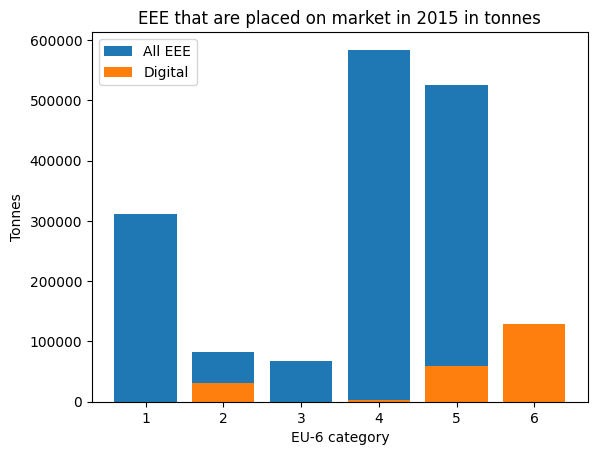

In [27]:
# Plot POM data in EU-6 categories in 2015 (tonnes)
plt.bar([cat for cat in range(1,7)], pom_eu6_t.loc[:, 2015])
plt.bar([cat for cat in range(1,7)], pom_eu6_digital_t.loc[:, 2015])
plt.xlabel('EU-6 category')
plt.ylabel('Tonnes')
plt.title('EEE that are placed on market in 2015 in tonnes')
plt.legend(['All EEE', 'Digital'])

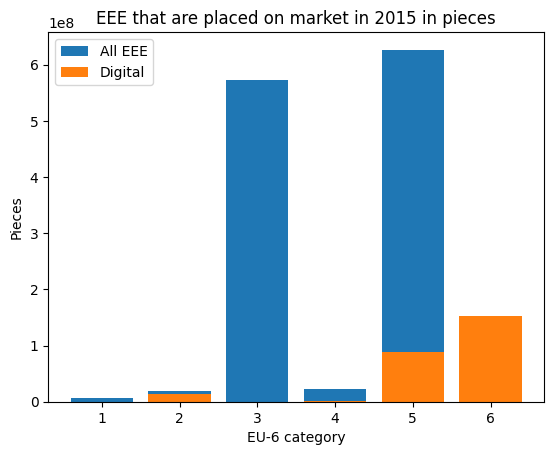

In [28]:
# Plot POM data in EU-6 categories in 2015 (pieces)
plt.bar([cat for cat in range(1,7)], pom_eu6_piece.loc[:, 2015])
plt.bar([cat for cat in range(1,7)], pom_eu6_digital_piece.loc[:, 2015])
plt.xlabel('EU-6 category')
plt.ylabel('Pieces')
plt.title('EEE that are placed on market in 2015 in pieces')
plt.legend(['All EEE', 'Digital'])

# WEEE estimation

In [29]:
# Lifespan profile parameters for different UNU codes
# Source: https://collections.unu.edu/eserv/UNU:6477/RZ_EWaste_Guidelines_LoRes.pdf

UNU_to_alpha = {
    1:      2.00,
    2:      3.50,
    101:    1.95,
    102:    1.64,
    103:    2.47,
    104:    2.20,
    105:    2.58,
    106:    2.00,
    108:    2.20,
    109:    2.74,
    111:    2.69,
    112:    2.39,
    113:    2.44,
    114:    1.90,
    201:    1.25,
    202:    2.06,
    203:    1.73,
    204:    1.45,
    205:    1.26,
    301:    1.25,
    302:    1.58,
    303:    1.60,
    304:    1.68,
    305:    1.24,
    306:    1.56,
    307:    1.46,
    308:    2.41,
    309:    2.33,
    401:    1.30,
    402:    0.79,
    403:    2.09,
    404:    1.67,
    405:    1.49,
    406:    1.41,
    407:    2.49,
    408:    2.01,
    501:    1.42,
    502:    1.60,
    503:    1.93,
    504:    1.60,
    505:    1.42,
    506:    2.34,
    507:    2.00,
    601:    1.82,
    602:    2.50,
    701:    1.43,
    702:    1.14,
    703:    2.40,
    801:    1.99,
    802:    2.41,
    901:    1.55,
    902:    1.92,
    1001:   2.00,
    1002:   2.00
}

UNU_to_beta = {
    1:      14.21,
    2:      25.00,
    101:    17.52,
    102:    14.20,
    103:    18.04,
    104:    15.16,
    105:    15.73,
    106:    13.47,
    108:    16.43,
    109:    24.20,
    111:    14.52,
    112:    13.56,
    113:    20.56,
    114:    14.07,
    201:    8.17,
    202:    11.22,
    203:    7.80,
    204:    10.25,
    205:    10.67,
    301:    5.91,
    302:    8.95,
    303:    6.57,
    304:    9.91,
    305:    7.22,
    306:    6.26,
    307:    7.78,
    308:    12.53,
    309:    7.39,
    401:    9.87,
    402:    7.97,
    403:    15.54,
    404:    10.47,
    405:    10.78,
    406:    8.12,
    407:    12.08,
    408:    11.75,
    501:    8.72,
    502:    8.43,
    503:    8.43,
    504:    6.90,
    505:    11.00,
    506:    16.59,
    507:    11.84,
    601:    11.28,
    602:    15.50,
    701:    4.56,
    702:    4.78,
    703:    11.56,
    801:    13.46,
    802:    13.52,
    901:    5.89,
    902:    11.56,
    1001:   10.06,
    1002:   10.06
}

$$L^{(p)}(t,n) = \frac{\alpha}{\beta^\alpha}(n-t)^{\alpha-1}e^{-[(n-t)/\beta]^\alpha}$$

In [30]:
# Lifespan profile formula
L = lambda t,n,a,b: a/(b**a)*(n-t)**(a-1)*np.e**-((n-t)/b)**a

$$W(n) = \sum_{t=t_0}^n \text{POM}(t) \cdot L^{(p)}(t,n) \ \text{with} \ t_0=n-3$$

In [31]:
# WEEE estimation formula (previous 3 years POM data)

# In tonnes
W_t = lambda unu,n: sum([pom_t.loc[unu,t] * L(t, n, UNU_to_alpha[unu], UNU_to_beta[unu]) for t in range(n-3,n)])

# In pieces
W_piece = lambda unu,n: sum([pom_piece.loc[unu,t] * L(t, n, UNU_to_alpha[unu], UNU_to_beta[unu]) for t in range(n-3,n)])

In [32]:
# WEEE estimation data by UNU keys and years

# In tonnes
weee_t_list = [
    [
        W_t(unu, year)
        for year in range(1998,2016)
    ]
    for unu in pom_t.index
]
weee_t = pd.DataFrame(weee_t_list, index=pom_t.index, columns=list(range(1998,2016)))

# In pieces
weee_piece_list = [
    [
        W_piece(unu, year)
        for year in range(1998,2016)
    ]
    for unu in pom_piece.index
]
weee_piece = pd.DataFrame(weee_piece_list, index=pom_piece.index, columns=list(range(1998,2016)))

In [33]:
# POM and digital POM data in EU-6 categories (tonnes)
weee_eu6_t = pd.DataFrame(0, index=list(range(1,7)), columns=list(range(1998,2016)))
weee_eu6_digital_t = pd.DataFrame(0, index=list(range(1,7)), columns=list(range(1998,2016)))
for idx in weee_t.index:
    weee_eu6_t.loc[UNU_to_EU6[idx], :] += weee_t.loc[idx, :]
    if idx in UNU_digital:
        weee_eu6_digital_t.loc[UNU_to_EU6[idx], :] += weee_t.loc[idx, :]

# POM and digital POM data in EU-6 categories (pieces)
weee_eu6_piece = pd.DataFrame(0, index=list(range(1,7)), columns=list(range(1998,2016)))
weee_eu6_digital_piece = pd.DataFrame(0, index=list(range(1,7)), columns=list(range(1998,2016)))
for idx in weee_piece.index:
    weee_eu6_piece.loc[UNU_to_EU6[idx], :] += weee_piece.loc[idx, :]
    if idx in UNU_digital:
        weee_eu6_digital_piece.loc[UNU_to_EU6[idx], :] += weee_piece.loc[idx, :]

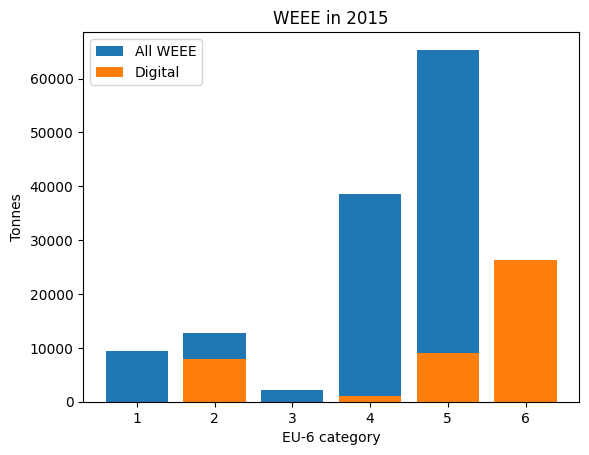

In [34]:
# Plot WEEE data in EU-6 categories in 2015 (tonnes)
plt.bar([cat for cat in range(1,7)], weee_eu6_t.loc[:, 2015])
plt.bar([cat for cat in range(1,7)], weee_eu6_digital_t.loc[:, 2015])
plt.xlabel('EU-6 category')
plt.ylabel('Tonnes')
plt.title('WEEE in 2015')
plt.legend(['All WEEE', 'Digital'])

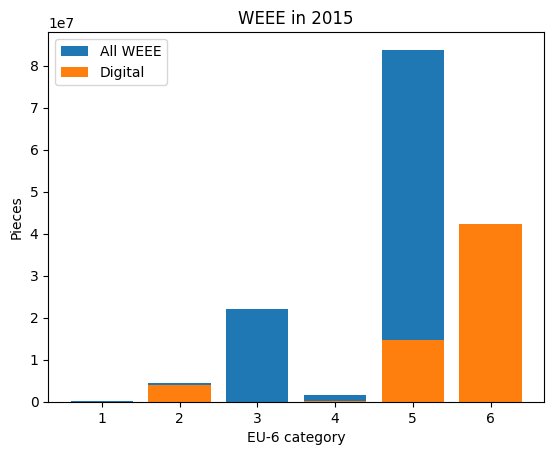

In [35]:
# Plot WEEE data in EU-6 categories in 2015 (pieces)
plt.bar([cat for cat in range(1,7)], weee_eu6_piece.loc[:, 2015])
plt.bar([cat for cat in range(1,7)], weee_eu6_digital_piece.loc[:, 2015])
plt.xlabel('EU-6 category')
plt.ylabel('Pieces')
plt.title('WEEE in 2015')
plt.legend(['All WEEE', 'Digital'])